In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *

In [ ]:
# Download data

In [2]:
untar_data?

Object `untar_data` not found.


In [6]:
path = untar_data(URLs.IMAGEWOOF_320)

In [8]:
path.ls()

[PosixPath('/Users/patrickaigner/.fastai/data/imagewoof2-320/train'),
 PosixPath('/Users/patrickaigner/.fastai/data/imagewoof2-320/val')]

In [ ]:
# Read data into dataloader

In [14]:
bs = 64

data = (ImageList.from_folder(path) 
        .split_by_folder(train='train', valid='val')             
        .label_from_folder()
        .transform(size = 320)
        .databunch(bs=bs)
        .normalize()) 

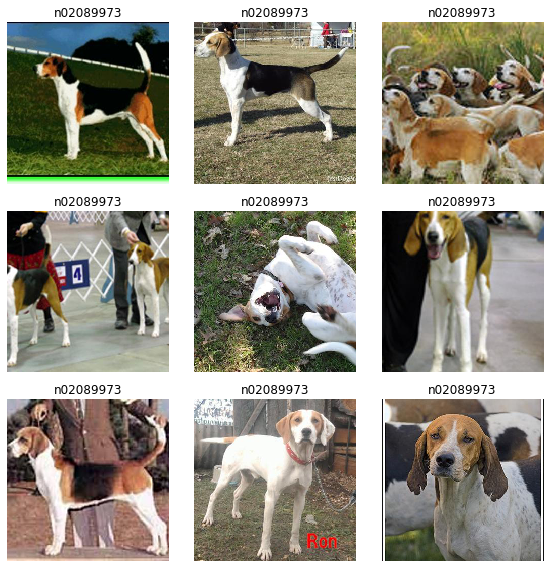

In [15]:
data.show_batch(3, 3, figsize=(8,8))

In [16]:
data.classes

['n02086240',
 'n02087394',
 'n02088364',
 'n02089973',
 'n02093754',
 'n02096294',
 'n02099601',
 'n02105641',
 'n02111889',
 'n02115641']

In [21]:
x,y = data.train_ds[0]

In [22]:
x.size

torch.Size([320, 320])

In [ ]:
# Create Model

In [23]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [34]:
model = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 64), # 2
    nn.BatchNorm2d(64),
    nn.ReLU(),
    conv(64, 128), # 2
    nn.BatchNorm2d(128),
    nn.ReLU(),
    conv(128, 64), # 2
    nn.BatchNorm2d(64),
    nn.ReLU(),
    conv(64, 32), # 2
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [35]:
# Create Learner

In [36]:
learn = Learner(data, model=model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [37]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 160, 160]        224        True      
______________________________________________________________________
BatchNorm2d          [8, 160, 160]        16         True      
______________________________________________________________________
ReLU                 [8, 160, 160]        0          False     
______________________________________________________________________
Conv2d               [16, 80, 80]         1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 80, 80]         32         True      
______________________________________________________________________
ReLU                 [16, 80, 80]         0          False     
______________________________________________________________________
Conv2d               [32, 40, 40]         4,640      True      
___________________________________________________

In [38]:
learn.lr_find(end_lr=100)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


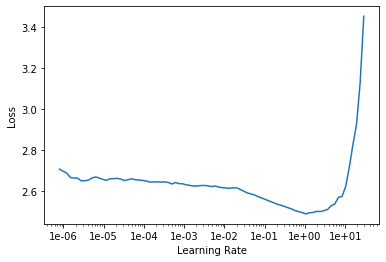

In [39]:
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,2.188263,4.090521,0.141257,02:24
1,2.096611,2.097246,0.207941,02:36
2,2.040064,2.016606,0.244592,02:29
